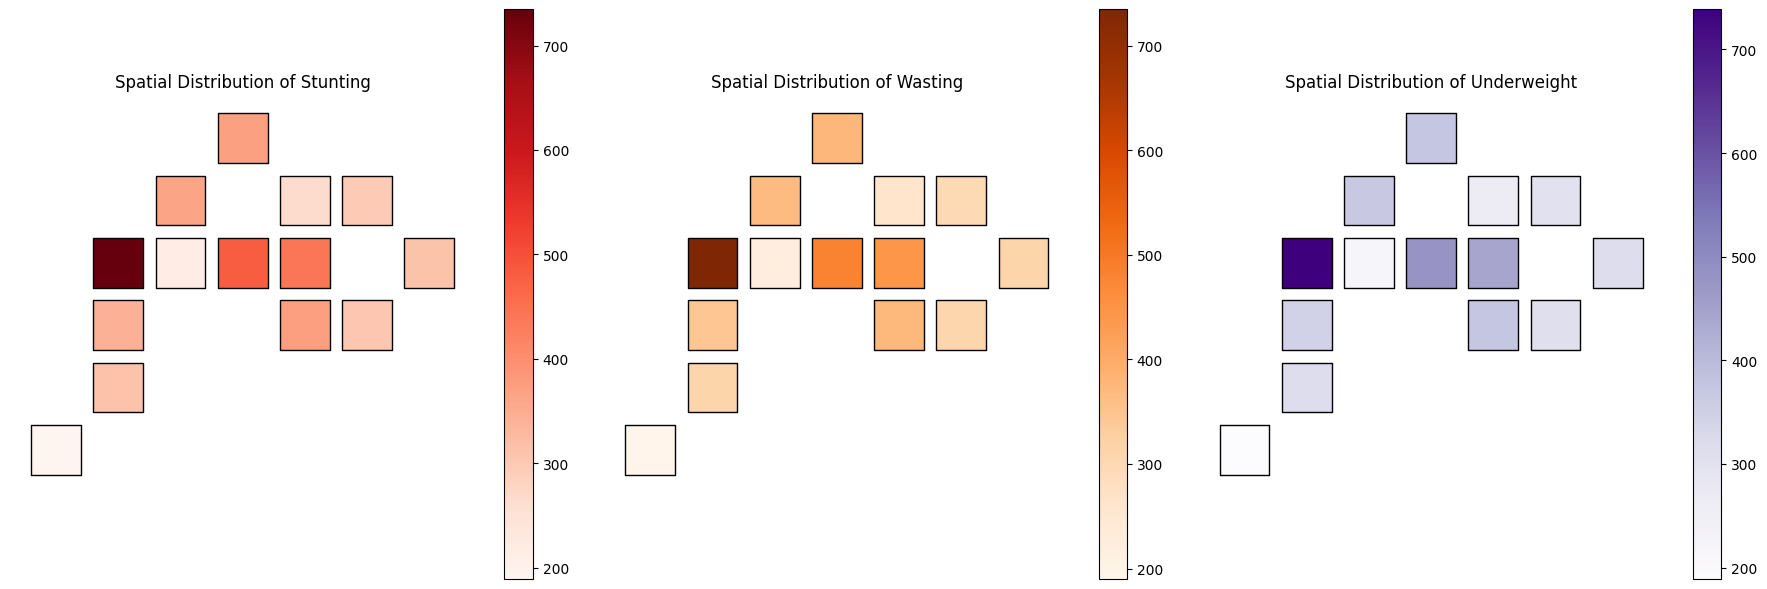

,Region,Year,Total_Malnutrition,High_Risk
0,Kampala,2022,659,0
1,Buganda,2023,2209,1
2,Busoga,2022,1440,1
3,Bukedi,2023,1123,1
4,Elgon,2022,924,0
5,Teso,2023,1330,1
6,Karamoja,2022,938,0
7,Lango,2023,898,0
8,Acholi,2022,795,0
9,West Nile,2023,1124,1


In [3]:
# Step 1. Import required libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import numpy as np

#Step 2. Create the dataset from Table 4.3
data = pd.DataFrame({
    "Region": ["Kampala", "Buganda", "Busoga", "Bukedi", "Elgon", "Teso",
               "Karamoja", "Lango", "Acholi", "West Nile", "Bunyoro",
               "Toro", "Ankole", "Kigezi"],
    "Year": [2022, 2023, 2022, 2023, 2022, 2023,
             2022, 2023, 2022, 2023, 2022, 2023, 2022, 2023],
    "Stunted": [218, 735, 480, 374, 306, 441, 311, 298, 265, 372, 366, 344, 313, 189],
    "Wasted": [220, 735, 480, 374, 309, 445, 313, 299, 264, 377, 367, 346, 312, 190],
    "Underweight": [221, 739, 480, 375, 309, 444, 314, 301, 266, 375, 369, 346, 314, 189],
    "Rainfall_Index": [0.75, 0.45, 0.55, 0.65, 0.70, 0.68, 0.50, 0.62, 0.58, 0.66, 0.60, 0.64, 0.57, 0.69],
    "Health_Access_Index": [0.90, 0.40, 0.60, 0.70, 0.80, 0.75, 0.45, 0.65, 0.55, 0.72, 0.62, 0.70, 0.60, 0.78]
})

#Step 3. Simulate spatial geometry for Uganda regions
coords = {
    "Kampala": (2, 4), "Buganda": (1, 4), "Busoga": (3, 4),
    "Bukedi": (4, 3), "Elgon": (5, 3), "Teso": (4, 4),
    "Karamoja": (6, 4), "Lango": (5, 5), "Acholi": (4, 5),
    "West Nile": (3, 6), "Bunyoro": (2, 5), "Toro": (1, 3),
    "Ankole": (1, 2), "Kigezi": (0, 1)
}

def square(x, y, size=0.8):
    return Polygon([
        (x, y),
        (x + size, y),
        (x + size, y + size),
        (x, y + size)
    ])

geometry = [square(*coords[r]) for r in data["Region"]]
gdf = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")

#Step 4. Plot spatial maps for malnutrition indicators
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

gdf.plot(column="Stunted", cmap="Reds", legend=True, ax=axes[0], edgecolor="black")
axes[0].set_title("Spatial Distribution of Stunting")

gdf.plot(column="Wasted", cmap="Oranges", legend=True, ax=axes[1], edgecolor="black")
axes[1].set_title("Spatial Distribution of Wasting")

gdf.plot(column="Underweight", cmap="Purples", legend=True, ax=axes[2], edgecolor="black")
axes[2].set_title("Spatial Distribution of Underweight")

for ax in axes:
    ax.axis("off")

plt.tight_layout()
plt.show()

#Step 5. Temporal and stochastic pattern assessment
data["Total_Malnutrition"] = (
    data["Stunted"] + data["Wasted"] + data["Underweight"]
)

risk_threshold = data["Total_Malnutrition"].mean()
data["High_Risk"] = np.where(data["Total_Malnutrition"] > risk_threshold, 1, 0)

data[["Region", "Year", "Total_Malnutrition", "High_Risk"]]

UPDATED CODE WITH REGION KEY AND VALUES INSIDE MAP

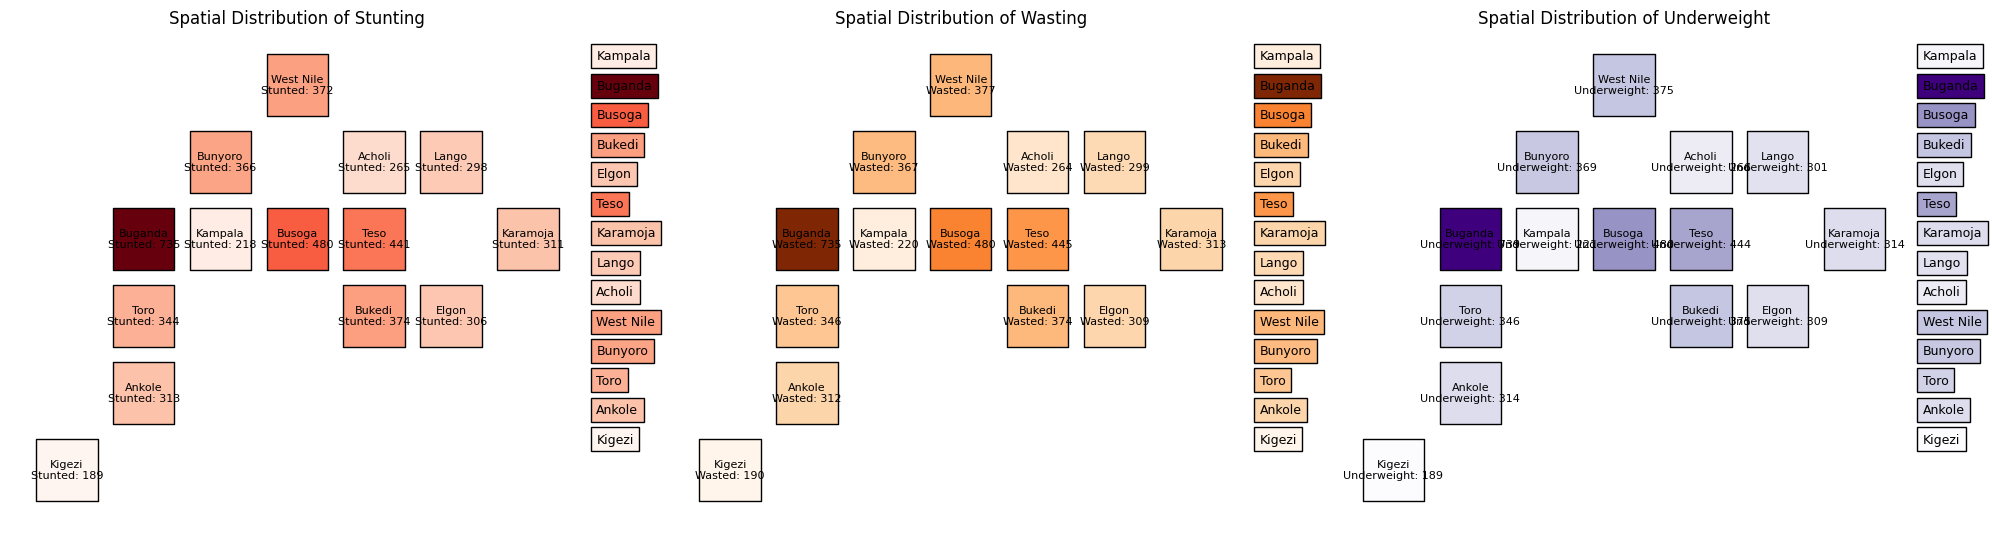

In [5]:
# Step 1. Import required libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Step 2. Create the dataset from Table 4.3
data = pd.DataFrame({
    "Region": ["Kampala", "Buganda", "Busoga", "Bukedi", "Elgon", "Teso",
               "Karamoja", "Lango", "Acholi", "West Nile", "Bunyoro",
               "Toro", "Ankole", "Kigezi"],
    "Year": [2022, 2023, 2022, 2023, 2022, 2023,
             2022, 2023, 2022, 2023, 2022, 2023, 2022, 2023],
    "Stunted": [218, 735, 480, 374, 306, 441, 311, 298, 265, 372, 366, 344, 313, 189],
    "Wasted": [220, 735, 480, 374, 309, 445, 313, 299, 264, 377, 367, 346, 312, 190],
    "Underweight": [221, 739, 480, 375, 309, 444, 314, 301, 266, 375, 369, 346, 314, 189]
})

# Step 3. Simulate spatial geometry for Uganda regions
coords = {
    "Kampala": (2, 4), "Buganda": (1, 4), "Busoga": (3, 4),
    "Bukedi": (4, 3), "Elgon": (5, 3), "Teso": (4, 4),
    "Karamoja": (6, 4), "Lango": (5, 5), "Acholi": (4, 5),
    "West Nile": (3, 6), "Bunyoro": (2, 5), "Toro": (1, 3),
    "Ankole": (1, 2), "Kigezi": (0, 1)
}

def square(x, y, size=0.8):
    return Polygon([
        (x, y),
        (x + size, y),
        (x + size, y + size),
        (x, y + size)
    ])

geometry = [square(*coords[r]) for r in data["Region"]]
gdf = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")

# Step 4. Plot maps with region values inside and region key
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

maps = [
    ("Stunted", "Reds", "Spatial Distribution of Stunting"),
    ("Wasted", "Oranges", "Spatial Distribution of Wasting"),
    ("Underweight", "Purples", "Spatial Distribution of Underweight")
]

for ax, (col, cmap_name, title) in zip(axes, maps):
    cmap = plt.get_cmap(cmap_name)
    norm = mcolors.Normalize(vmin=gdf[col].min(), vmax=gdf[col].max())

    # Plot the map
    gdf.plot(column=col, cmap=cmap, ax=ax, edgecolor="black", legend=False)
    ax.set_title(title, fontsize=12)
    ax.axis("off")

    # Write values inside each region
    for idx, row in gdf.iterrows():
        x, y = row.geometry.centroid.coords[0]
        ax.text(
            x, y,
            f"{row['Region']}\n{col}: {row[col]}",
            ha="center",
            va="center",
            fontsize=8,
            color="black"
        )

    # Add custom colored Key with region names
    for i, region in enumerate(gdf["Region"]):
        color = cmap(norm(gdf.loc[i, col]))
        ax.text(
            1.02, 0.95 - i*0.06,
            region,
            transform=ax.transAxes,
            fontsize=9,
            va="center",
            bbox=dict(facecolor=color, edgecolor="black")
        )

plt.tight_layout()
plt.show()
